<a href="https://colab.research.google.com/github/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management/blob/master/src/Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from numpy.linalg import *
import os

In [2]:
!git clone https://github.com/wqiu96/MA574_Portfolio-Valuation-and-Risk-Management.git

Cloning into 'MA574_Portfolio-Valuation-and-Risk-Management'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 1.78 MiB | 1.59 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
cd MA574_Portfolio-Valuation-and-Risk-Management/src/project3/

/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3


In [0]:
#Load data
os.chdir('/content/MA574_Portfolio-Valuation-and-Risk-Management/src/project3/')
file_chdir = os.getcwd()
filecsv_list = []
for root,dirs,files in os.walk(file_chdir):
  for file in files:
    if os.path.splitext(file)[1] == '.csv':
      filecsv_list.append(file)
data = []
for csv in filecsv_list:
  df = pd.read_csv(csv)
  df['Date'] = pd.to_datetime(df['Date'])
  df.set_index('Date',inplace= True)
  data.append(df)
  del df
 

In [0]:
#Set the break points for every year
start_day = []
for i in range(2009,2020):
  start_day.append(str(i) + '-10-18')
start_day[0] = '2009-10-19'
start_day[5] = '2014-10-17'
start_day[6] = '2009-10-19'

In [0]:
R_expect_1 = np.zeros((len(data),1))
R_expect_2 = np.zeros((len(data),1))
R_expect_3 = np.zeros((len(data),1))
def expect_return(data,startpoint,endpoint,dif_year):
  R_expect = np.zeros((len(data),1))
  for i in range(len(data)):     
    R_expect[i] = ((data[i][endpoint:endpoint]['Adj Close'].values)/data[i][startpoint:startpoint]['Adj Close'].values)**(1/dif_year) - 1

  return R_expect

In [0]:
#annual expected returns 
R_expect_1 = expect_return(data,start_day[0],start_day[5],5)
R_expect_2 = expect_return(data,start_day[0],start_day[7],7)
R_expect_3 = expect_return(data,start_day[0],start_day[10],10)

In [0]:
R_year = np.zeros((len(data),len(start_day)-1))
for j in range(len(start_day)-1):
  R_year[:,j] = expect_return(data,start_day[j],start_day[j+1],1).T
  

In [0]:
R_year_R = pd.DataFrame(R_year.T)

In [0]:
R_cov =  np.array(R_year_R[0:5].cov())
R_expect = R_expect_1
one = np.ones((len(R_expect),1))
A = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),R_expect)
B = np.dot(np.dot(R_expect.reshape(1,-1),inv(R_cov)),R_expect)
C = np.dot(np.dot(one.reshape(1,-1),inv(R_cov)),one)
D = B*C - A**2
g = (B * np.dot(inv(R_cov), one) - A* np.dot(inv(R_cov), R_expect))/D
h = (C * np.dot(inv(R_cov), R_expect) - A* np.dot(inv(R_cov), one))/D
min_sigma = np.dot(np.dot(g.reshape(1,-1),R_cov),g) - (np.dot(np.dot(h.reshape(1,-1),R_cov),g)**2)/np.dot(np.dot(h.reshape(1,-1),R_cov),h)

In [198]:
print(g,h)

[[ 0.10082203]
 [ 0.73435524]
 [ 0.62020348]
 [-1.82296152]
 [-0.82804045]
 [ 0.02563921]
 [ 3.31948826]
 [ 0.05950918]
 [ 0.23614101]
 [-0.49625043]
 [-0.14212965]
 [-0.23728785]
 [-0.5115488 ]
 [-0.64966263]
 [ 0.09036429]
 [ 0.01177362]
 [ 0.4147958 ]
 [-0.03040287]
 [ 0.14336006]
 [-0.03816798]] [[ -1.7639612 ]
 [ -5.51176826]
 [ -5.84908624]
 [ 16.83612802]
 [  7.8304932 ]
 [ -0.43930297]
 [-22.38125584]
 [ -0.29929781]
 [ -1.22690911]
 [  5.63754337]
 [  1.19581557]
 [  2.26927696]
 [  3.38575202]
 [  4.88340408]
 [ -0.55462384]
 [  0.82397352]
 [ -3.55381943]
 [  0.34104145]
 [ -1.82966111]
 [  0.2062576 ]]


In [199]:
min_sigma

array([[4.14184436e-18]])

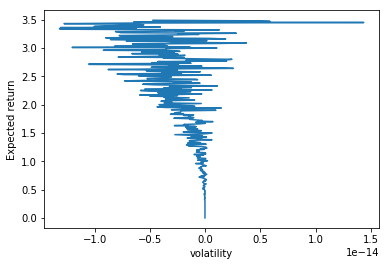

[[-0.42836633]
 [-0.91917524]
 [-1.13452239]
 [ 3.22787689]
 [ 1.52110751]
 [-0.10615168]
 [-3.39488849]
 [-0.03028016]
 [-0.13193172]
 [ 1.19501258]
 [ 0.21661502]
 [ 0.44349523]
 [ 0.50417681]
 [ 0.81535859]
 [-0.07602286]
 [ 0.25896568]
 [-0.65135003]
 [ 0.07190956]
 [-0.40553827]
 [ 0.0237093 ]]


In [204]:
sigma = []
mu = []
weight = []
for i in range(0,350):
    mu.append(0.01*i)
    w = g + h*0.01*i
    weight.append(w)
    sigma_ = np.dot(np.dot(w.reshape(1,-1),R_cov),w)
    sigma.append(sigma_[0][0])
plt.plot(sigma,mu)
plt.ylabel("Expected return")
plt.xlabel("volatility")
plt.show()
print(weight[30])